In [164]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('science')

import os, sys, time


sys.path.insert(0,"/import/freenas-m-03-geodynamics/jhayek/petsc-3.12.5/lib/petsc/bin/")
sys.path.insert(0,"/import/freenas-m-03-geodynamics/jhayek/TEAR/se2wave/utils/python")
sys.path.insert(0,"/import/freenas-m-03-geodynamics/jhayek/TEAR/processing/TEAR/PythonCodes/")
from se2waveload import *
from Lib_GeneralFunctions import *
from GeneratePaperFigs import *
from ModelIllustration import *

import pandas as pd
import json

In [165]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [166]:
from palettable.colorbrewer.diverging import PuOr_11_r as FieldColor

cmap = FieldColor.mpl_colormap

from matplotlib.colors import ListedColormap
import matplotlib.lines as mlines
from palettable.cartocolors.qualitative import Safe_5 as LineColor

cmapProf = ListedColormap(LineColor.mpl_colors[:])

In [167]:
def PlotStressNProfile(path, AxPair, TimeTxt, LocIni=[1513.8,-200], LocEnd=[1513.8,200], length = 1000):
    
    #Load the data
    StressFromPickle = LoadPickleFile(path + "Out/", "StressInAPickle")
    StressData = pd.read_csv(path + "Out/StressData.csv")


    #Plot the stress
    img = AxPair[0].pcolormesh(StressFromPickle[0], StressFromPickle[1], StressFromPickle[2], shading='gouraud', cmap = cmap,
                          vmax = 2e7, vmin= -2e7,rasterized=True)

    # Colorbar for the ax2
    cbaxes = inset_axes(AxPair[0], width="35%",height="4%",loc=3, borderpad=2)
    plt.colorbar(img,cax=cbaxes,orientation="horizontal", label=r"$\sigma_{12}$ [Pa]")
    cbaxes.xaxis.set_label_position('top')

    cbaxes.get_xaxis().get_offset_text().set_visible(False)
    ax_max = max(cbaxes.get_xticks())
    exponent_axis = np.floor(np.log10(ax_max)).astype(int)
    cbaxes.annotate(r'$\times$10$^{%i}$'%(exponent_axis),
                xy=(1.01, -.01), xycoords='axes fraction')

    AxPair[0].annotate(text="time [s]: {0:.2f}".format(TimeTxt),xy=[0.05,0.9], xycoords= "axes fraction")


    # Line to mark location of the transect
    AxPair[0].annotate("",   xy = (LocIni[0], LocIni[1]),
                        xycoords = 'data',
                        xytext = (LocEnd[0], LocEnd[1]), 
                        textcoords = 'data',
                        arrowprops = dict(
                            arrowstyle = "<->",
                            connectionstyle = "arc3", 
                            color = 'white',
                            alpha = 1,
                            linewidth = .3
                            ),
                        )
    # Zoom in to the stress field
    AxPair[0].set_xlim([1000,2000])
    AxPair[0].set_ylim([-500,500])
    
    line1, = AxPair[1].plot(StressData["Points:1"],StressData["sigma_yy"],label='$\sigma_{22}$')
    line2, = AxPair[1].plot(StressData["Points:1"],StressData["sigma_xy"],label='$\sigma_{12}$')
    AxPair[1].legend(handles=[line1, line2])

In [168]:
TimeStep = 800
JSONfilename= 'step-{TimeStep:04d}_wavefield.json'.format(TimeStep=TimeStep)

print(JSONfilename)
with open(path.format("NC")+JSONfilename, 'r') as json_file:
  LoadedJson = json.load(json_file)

TimeTxt = float(LoadedJson["se2wave"]["time"])


step-0800_wavefield.json


Saving Figure...


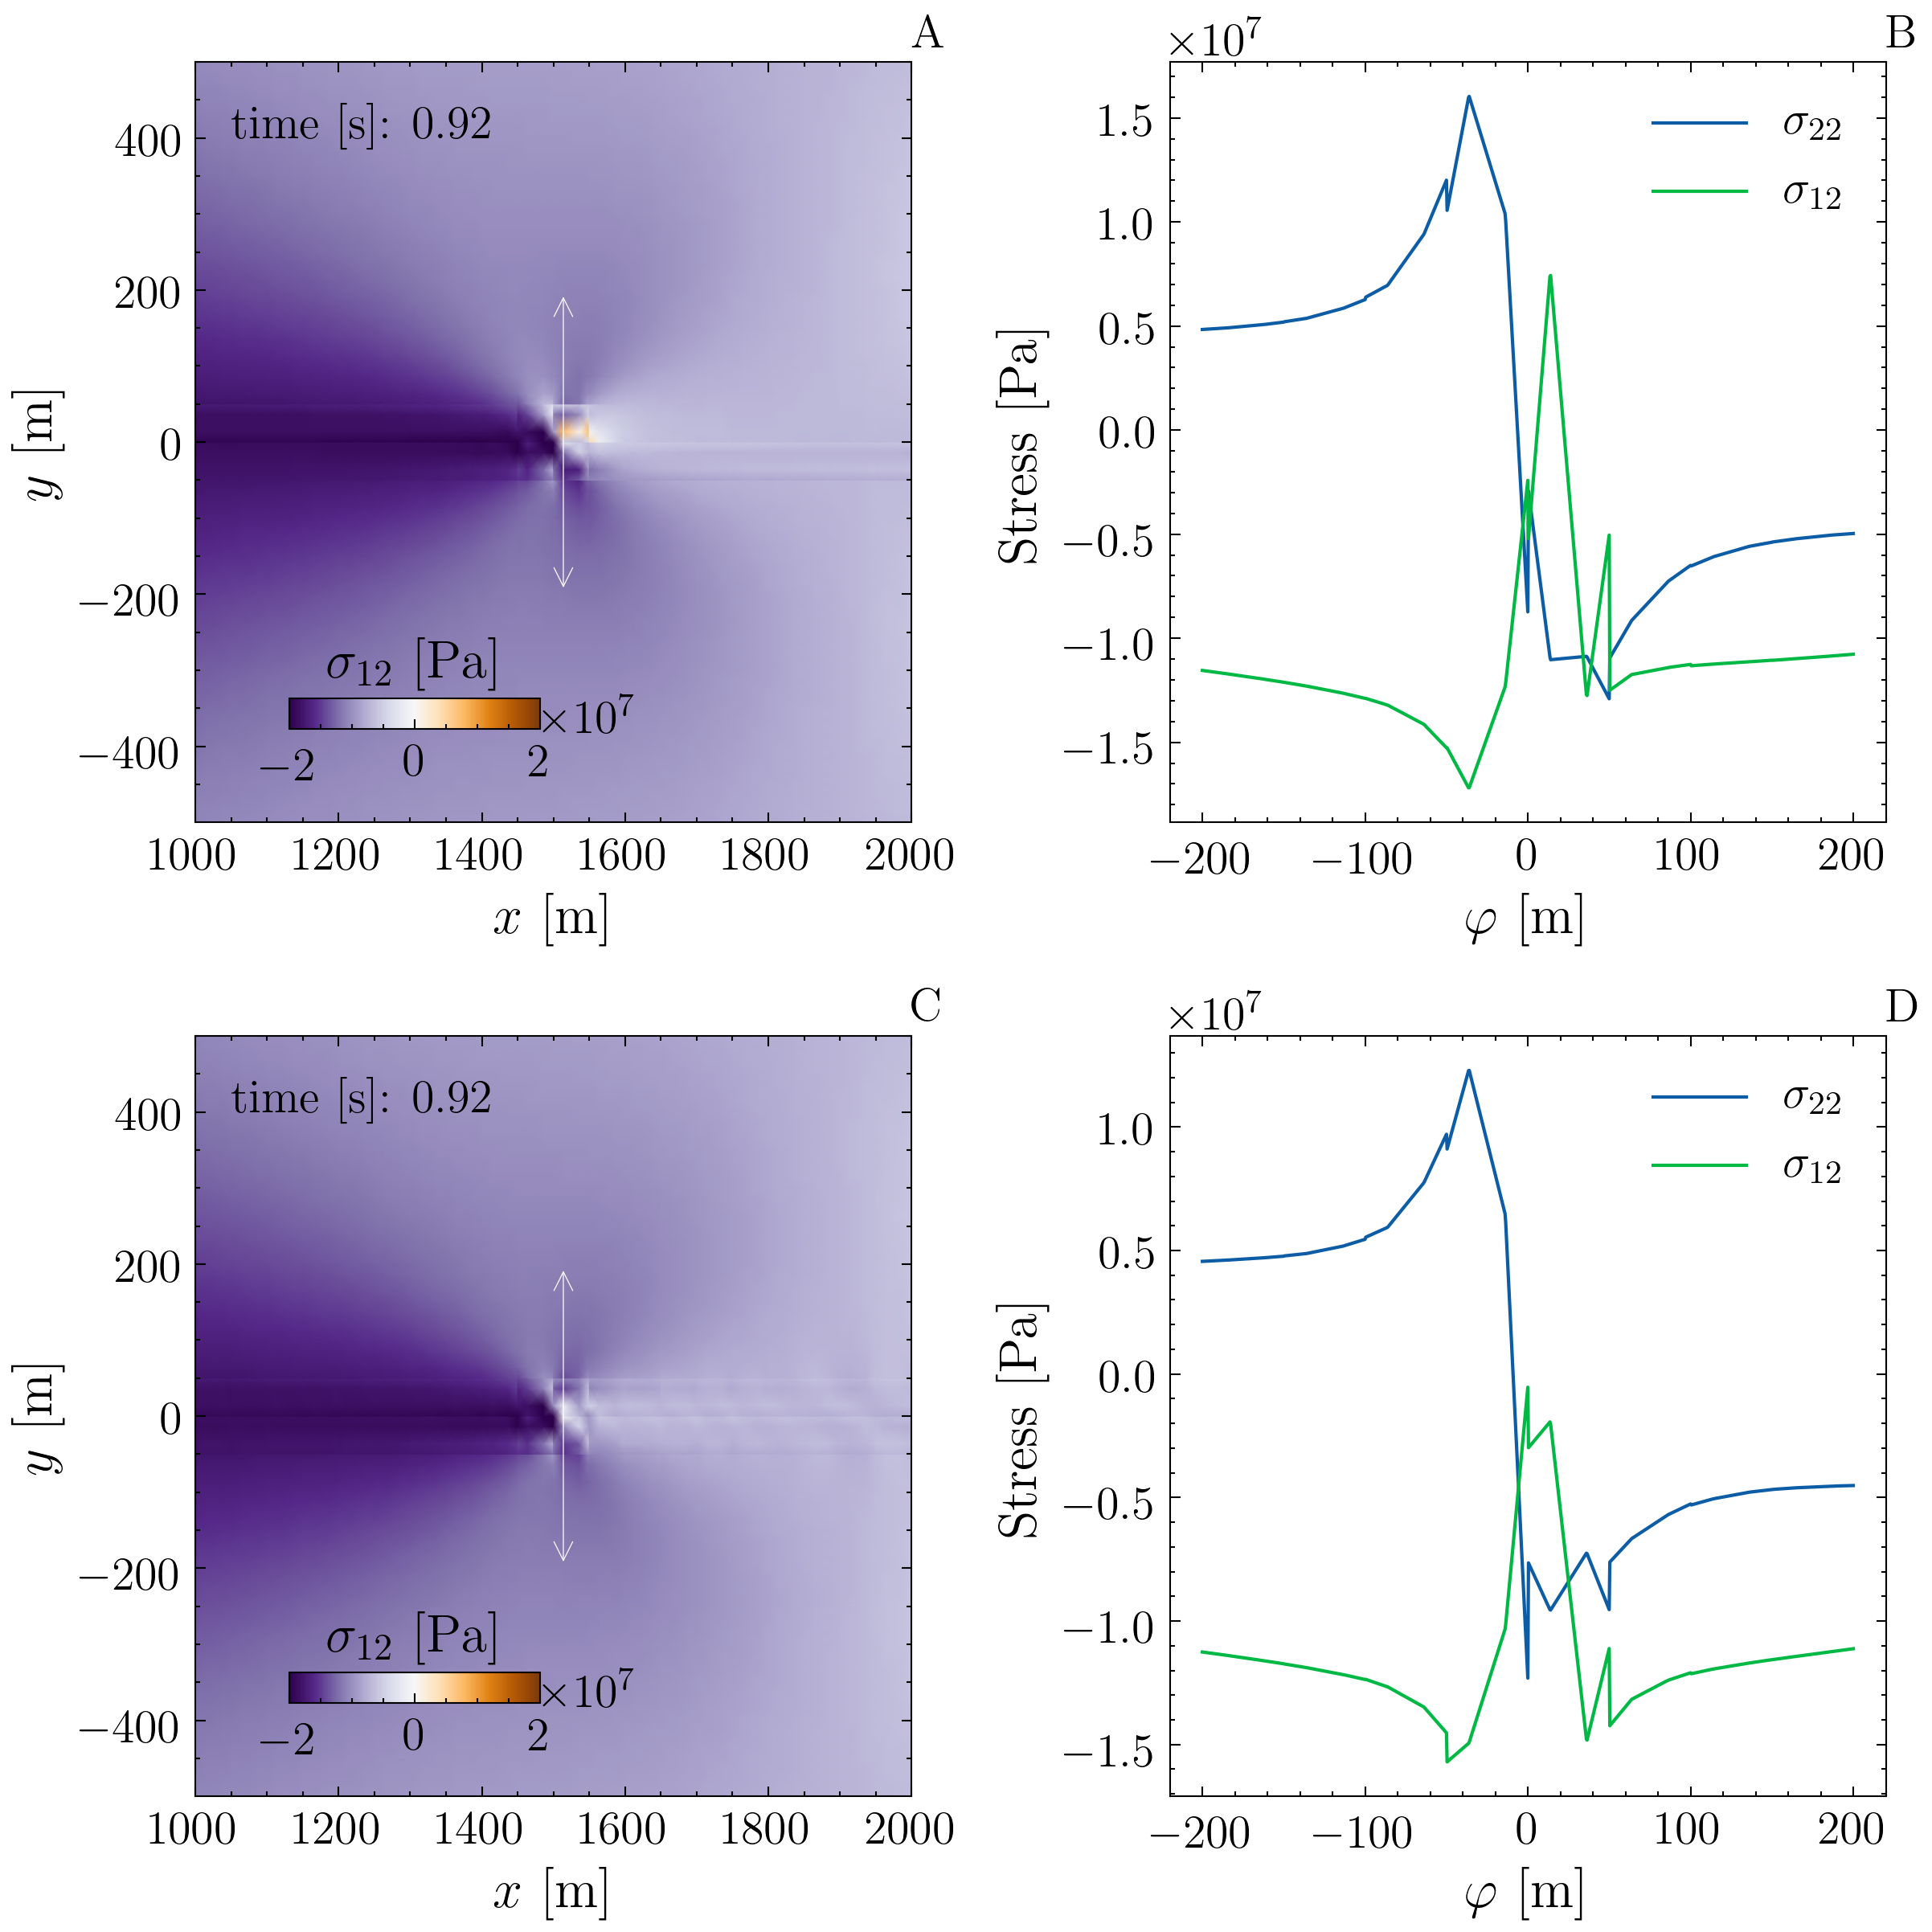

In [169]:

fig = plt.figure(figsize = (8, 8),dpi=300,constrained_layout=True) #constrained_layout=True
gs = fig.add_gridspec(2, 2, wspace=0.15,hspace=0.2)


ax01 = fig.add_subplot(gs[0, 0])
ax02 = fig.add_subplot(gs[1, 0])

ax01Prof = fig.add_subplot(gs[0, 1])
ax02Prof = fig.add_subplot(gs[1, 1])


path = "/import/freenas-m-03-geodynamics/jhayek/TEAR/Results/T2/Runs/TEAR51_TPV_T0_P3_025x025_A12phi65_Delta1.001_3s_{}/"


PlotStressNProfile(path.format("NC"), [ax01,ax01Prof],TimeTxt)
PlotStressNProfile(path.format("C"), [ax02,ax02Prof],TimeTxt)


ax01.set_xlabel("$x$ [m]"), ax01.set_ylabel("$y$ [m]")
ax02.set_xlabel("$x$ [m]"), ax02.set_ylabel("$y$ [m]")

ax01Prof.set_xlabel(r"$\varphi$ [m]"), ax01Prof.set_ylabel("Stress [Pa]")
ax02Prof.set_xlabel(r"$\varphi$ [m]"), ax02Prof.set_ylabel("Stress [Pa]")

LabelizeAxisList([ax01,ax01Prof,ax02,ax02Prof],Pos=[1., 1.02])


print("Saving Figure...")
OutFile = "/import/freenas-m-03-geodynamics/jhayek/SharedWolfel/Works/se2dr_Paper/Illustrations/FinalFigures/F{}.pdf"
fig.savefig(OutFile.format("Sb"))
OutFile = "/import/freenas-m-03-geodynamics/jhayek/SharedWolfel/Works/se2dr_Paper/Illustrations/FinalFigures/F{}.png"
fig.savefig(OutFile.format("Sb"))